# 5. 인공지능과 가위바위보 하기

In [1]:
import os
import glob
from PIL import Image
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#train set resize
image_dir_path = os.getenv("HOME") + "/aiffel/rsp_01/rps"

def resize_images(img_path):
    classes = ['/scissors', '/paper', '/rock']
    target_size = (32,32)
    
    num = 0
    
    for c in classes :
        images=glob.glob(img_path + c + "/*.jpg")
        for img in images:
            old_img=Image.open(img)
            new_img=old_img.resize(target_size,Image.ANTIALIAS)
            new_img.save(img, "JPEG")
            num += 1
        
    print('Toltal :',num)
    
    return num

numbumer_of_data = resize_images(image_dir_path)

numbumer_of_data

Toltal : 2889


2889

In [3]:
#test셋에 대해서도 마찬가지로 Resize

image_test_dir_path = os.getenv("HOME") + "/aiffel/DATA_RSP/test"
resize_images(image_test_dir_path)

Toltal : 300


300

In [4]:
#train data에 대해 3개의 클래스 즉, 가위: 0, 바위: 1, 보: 2 로 라벨링

def load_data(img_path):
    # 가위 : 0, 바위 : 1, 보 : 2
    number_of_data=2889
    img_size=32
    color=3
    
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(train_dir+'/scissors/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(train_dir+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1       
    
    for file in glob.iglob(train_dir+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는",idx,"입니다.")
    return imgs, labels

train_dir = os.getenv("HOME") + "/aiffel/rsp_01/rps"
(x_train, y_train)=load_data(train_dir)

x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 2889 입니다.
x_train shape: (2889, 32, 32, 3)
y_train shape: (2889,)


In [5]:
#test data에 대해 3개의 클래스 즉, 가위: 0, 바위: 1, 보: 2 로 라벨링
def load_data(ima_path):
    # 가위 : 0, 바위 : 1, 보 : 2
    number_of_data=300 # 가위바위보 이미지 개수 총합에 주의하세요.
    img_size=32
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(test_dir+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(test_dir+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1       
    
    for file in glob.iglob(test_dir+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("테스트데이터(x_test)의 이미지 개수는",idx,"입니다.")
    return imgs, labels

test_dir = os.getenv("HOME") + "/aiffel/DATA_RSP/test"
(x_test, y_test)=load_data(test_dir)
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

테스트데이터(x_test)의 이미지 개수는 200 입니다.
x_test shape: (300, 32, 32, 3)
y_test shape: (300,)


In [6]:
# 데이터 확인

라벨: 0


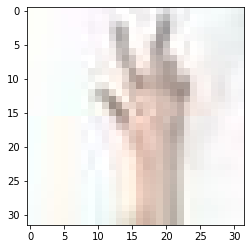

In [7]:
plt.imshow(x_train[1])
print('라벨:', y_train[1])

In [8]:
#학습을 위한 channel, dense, img_size 지정
n_channel_1=32
n_channel_2=64
n_channel_3 = 128

IMG_HEIGHT = 32
IMG_WIDTH = 32

In [9]:
#채널 추가를 위한 data reshape
x_train_reshaped=x_train_norm.reshape( -1, 32, 32, 3)  
x_test_reshaped=x_test_norm.reshape( -1, 32, 32, 3)

In [10]:
# Baseline 모델 만들어보기!

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(IMG_HEIGHT,IMG_WIDTH,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(3, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 2304)              0         
_________________________________________________________________
dense (Dense)                (None, 3)                 6915      
Total params: 26,307
Trainable params: 26,307
Non-trainable params: 0
____________________________________________________

In [11]:
model.compile(optimizer='adam',
            loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])



callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

history = model.fit(x_train_reshaped, y_train, batch_size=100,epochs=10, 
                    verbose=1, validation_data=(x_test_reshaped, y_test),
                    shuffle=True, callbacks =[callback])


test_loss, test_accuracy = model.evaluate(x_test_reshaped, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

Epoch 1/10


/opt/conda/lib/python3.9/site-packages/keras/backend.py:4906: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  warnings.warn(


29/29 [==============================] - 5s 165ms/step - loss: 0.9815 - accuracy: 0.5760 - val_loss: 1.1857 - val_accuracy: 0.0267
Epoch 2/10
29/29 [==============================] - 5s 158ms/step - loss: 0.5550 - accuracy: 0.8598 - val_loss: 1.4725 - val_accuracy: 0.0000e+00
Epoch 3/10
29/29 [==============================] - 5s 157ms/step - loss: 0.2516 - accuracy: 0.9408 - val_loss: 1.5207 - val_accuracy: 0.0067
Epoch 4/10
29/29 [==============================] - 5s 163ms/step - loss: 0.1531 - accuracy: 0.9585 - val_loss: 1.6531 - val_accuracy: 0.0067
Epoch 5/10
29/29 [==============================] - 5s 160ms/step - loss: 0.0954 - accuracy: 0.9848 - val_loss: 1.3278 - val_accuracy: 0.1767
Epoch 6/10
29/29 [==============================] - 4s 155ms/step - loss: 0.0657 - accuracy: 0.9896 - val_loss: 1.5203 - val_accuracy: 0.1233
Epoch 7/10
29/29 [==============================] - 5s 156ms/step - loss: 0.0444 - accuracy: 0.9945 - val_loss: 1.6987 - val_accuracy: 0.1100
Epoch 8/10
29

test_accuracy가 0.109로 형편없는 것을 확인. 다르게 모델링 해보자!

In [12]:
#층을 좀 더 깊이 쌓고, Overfitting 방지를 위해 Dropout 추가 및 정규화를 위한 he_uniform 적용!

In [13]:
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', 
                              input_shape=(IMG_HEIGHT,IMG_WIDTH,3)))
model.add(keras.layers.MaxPooling2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Conv2D(n_channel_3, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(512, activation='relu', kernel_initializer='he_uniform'))
model.add(keras.layers.Dense(3, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 4, 4, 128)         73856     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 2, 2, 128)         0         
_________________________________________________________________
dropout (Dropout)            (None, 2, 2, 128)        

In [14]:
model.compile(optimizer='adam',
            loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])


callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

history = model.fit(x_train_reshaped, y_train,epochs=10, 
                    verbose=1, validation_data=(x_test_reshaped, y_test),
                    shuffle=True, callbacks =[callback])


test_loss, test_accuracy = model.evaluate(x_test_reshaped, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

Epoch 1/10
91/91 [==============================] - 6s 65ms/step - loss: 0.5856 - accuracy: 0.7459 - val_loss: 1.4375 - val_accuracy: 0.1300
Epoch 2/10
91/91 [==============================] - 6s 65ms/step - loss: 0.0672 - accuracy: 0.9813 - val_loss: 1.1912 - val_accuracy: 0.3333
Epoch 3/10
91/91 [==============================] - 6s 64ms/step - loss: 0.0234 - accuracy: 0.9952 - val_loss: 1.0010 - val_accuracy: 0.4633
Epoch 4/10
91/91 [==============================] - 6s 65ms/step - loss: 0.0071 - accuracy: 0.9983 - val_loss: 1.1165 - val_accuracy: 0.3567
Epoch 5/10
91/91 [==============================] - 6s 65ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 1.0154 - val_accuracy: 0.5033
Epoch 6/10
91/91 [==============================] - 6s 64ms/step - loss: 6.3028e-04 - accuracy: 1.0000 - val_loss: 0.9457 - val_accuracy: 0.5133
Epoch 7/10
91/91 [==============================] - 6s 65ms/step - loss: 6.4666e-04 - accuracy: 1.0000 - val_loss: 1.1341 - val_accuracy: 0.4733
Epoch

test_accuracy가 0.52로 루브릭 기준에 못미친다..

In [21]:
base_model = tf.keras.applications.VGG16(input_shape=(32,32,3),
                                         include_top=False,
                                         weights='imagenet')

58900480/58889256 [==============================] - 1s 0us/step


In [22]:
base_model.trainable = False

In [23]:
inputs = keras.Input(shape=(32, 32, 3))
x = base_model(inputs, training=False)
x = keras.layers.GlobalAveragePooling2D()(x)
x = keras.layers.Dropout(0.5)(x)
outputs = keras.layers.Dense(3, activation='softmax')(x)
model = keras.Model(inputs, outputs)
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
vgg16 (Functional)           (None, 1, 1, 512)         14714688  
_________________________________________________________________
global_average_pooling2d_1 ( (None, 512)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 1539      
Total params: 14,716,227
Trainable params: 1,539
Non-trainable params: 14,714,688
_________________________________________________________________


아래와 같이 VGG16을 base_model로 학습시켰으나, 오히려 accuracy가 더 떨어졌다..

In [24]:
model.compile(optimizer=keras.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x_train_reshaped, y_train, epochs=5, validation_data=(x_test_reshaped, y_test))

test_loss, test_accuracy = model.evaluate(x_test_reshaped, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

Epoch 1/5
91/91 [==============================] - 48s 525ms/step - loss: 0.8622 - accuracy: 0.6192 - val_loss: 1.1937 - val_accuracy: 0.3367
Epoch 2/5
91/91 [==============================] - 47s 521ms/step - loss: 0.5336 - accuracy: 0.8300 - val_loss: 1.2555 - val_accuracy: 0.3400
Epoch 3/5
91/91 [==============================] - 47s 517ms/step - loss: 0.4166 - accuracy: 0.8750 - val_loss: 1.3641 - val_accuracy: 0.3433
Epoch 4/5
91/91 [==============================] - 47s 521ms/step - loss: 0.3610 - accuracy: 0.8889 - val_loss: 1.4617 - val_accuracy: 0.3400
Epoch 5/5
91/91 [==============================] - 47s 516ms/step - loss: 0.3124 - accuracy: 0.9034 - val_loss: 1.4039 - val_accuracy: 0.3433
10/10 - 4s - loss: 1.4039 - accuracy: 0.3433
test_loss: 1.40387761592865 
test_accuracy: 0.34333333373069763


# 회고


 가장 급박하게 한 익스였다. 결국 끝을 내지만 아쉬움이 많다. 크게 정리해보자면
 
 
 1) data argumentation을 추가적으로 진행해볼 수 있었으나, 결국 시도해보지 못했다.
 
 2) 데이터 prediction을 시각화하는 작업을 해볼 수 있으나 못해보았다. 
 
 3) Resnet, vgg16와 같은 모델을 transfer learning해보았으나, accuracy가 유의미하게 상승하지 않았다. 최종 제출코드에 첨부된 VGG16을 base_model로 frozen하였으나, test_accuracy가 낮게 나왔다.
 
 4) 왜 그런가에 대해 조금 더 면밀히 탐구가 필요하다. 
 
 5) CV에 관한 익스는 처음이었는데.. Vision을 다루는 작업에 그닥 흥미를 못느끼겠다. 아마 실력이 부족해서 그런것 같다.
 
 
 7) 제대로 안하면 회고에 멀 써야할지 잘모른다. 
 
 8) 중요한 것은 결국 루브릭 기준인 test_accuracy 60%를 못넘겼다는 사실이다. 반성하자..
 
 